In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('../data/auto-mpg.csv')
d.origin = pd.Categorical(d.origin.replace({1: 'america', 2: 'europe', 3: 'asia'}))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('white')
sns.set_palette('Accent')
#sns.color_palette()
plt.rcParams['figure.figsize'] = (8,6)

### Distribution of one variable

C:\Users\alina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


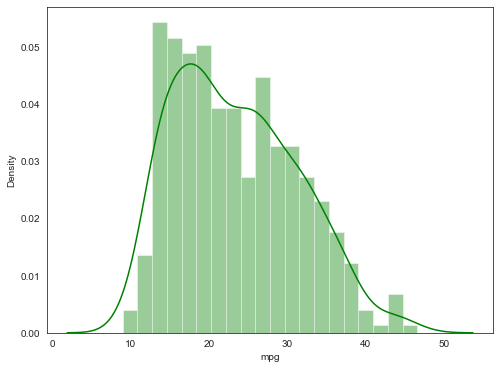

In [5]:
sns.distplot(d.mpg, kde=True, bins=20, color='green');

#### Change the aggregation level

C:\Users\alina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


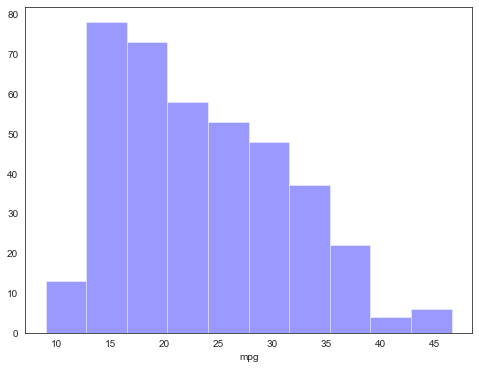

In [6]:
sns.distplot(d.mpg, kde=False, bins=10, color='blue');

#### Plot the Kernel Density Estimate

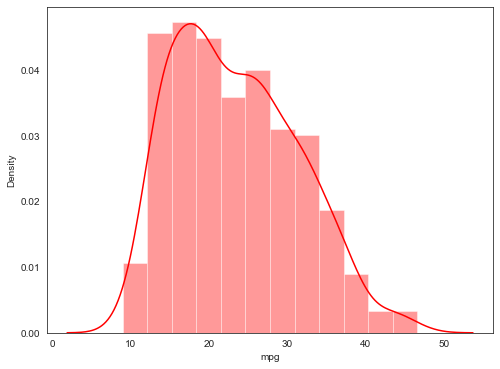

In [7]:
sns.distplot(d.mpg, color='red');

### Distribution of two variables

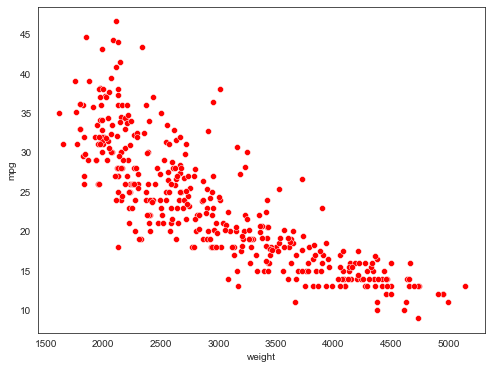

In [8]:
sns.scatterplot(x='weight', y='mpg', data=d, color='red');

#### Colour by a categorical variable

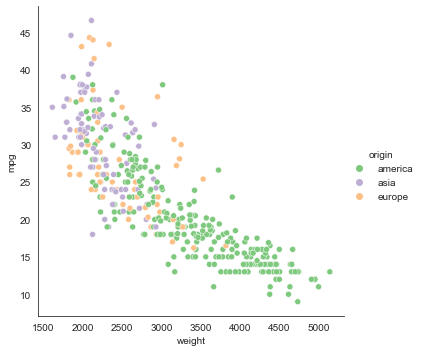

In [9]:
sns.relplot(x='weight', y='mpg', hue='origin', data=d);

#### Colour by a categorical variable and adjust the weight by a continuous one

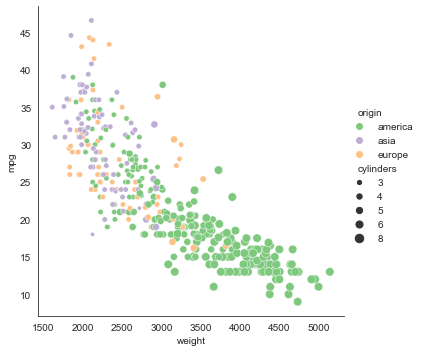

In [10]:
sns.relplot(x='weight', y='mpg', hue='origin', size='cylinders', data=d);

### Plot the correlation matrix

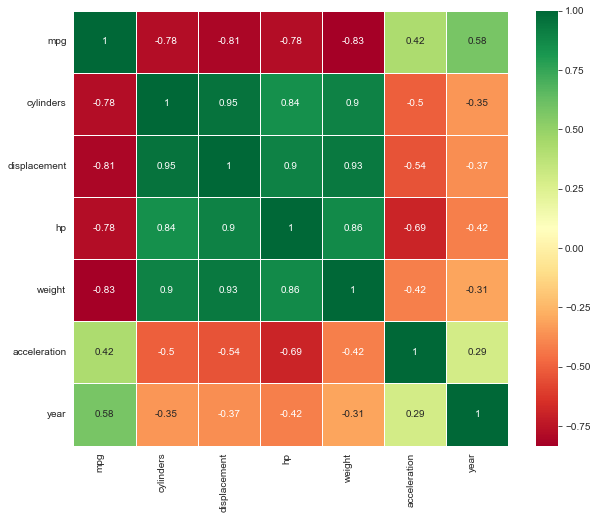

In [11]:
corr = d.corr()
fig, ax = plt.subplots(figsize=(10,8))
h = sns.heatmap(corr, cmap=plt.cm.RdYlGn, annot=True, linewidths=1, square=True, ax=ax)
ax.set_ylim(len(corr),0) # Due to a bug in Matplotlib 3.1.1
h.set_xticklabels(h.get_xticklabels(), rotation=90, ha='right')
h.set_yticklabels(h.get_yticklabels(), rotation=0, ha='right');

### Combine scatterplots and histograms

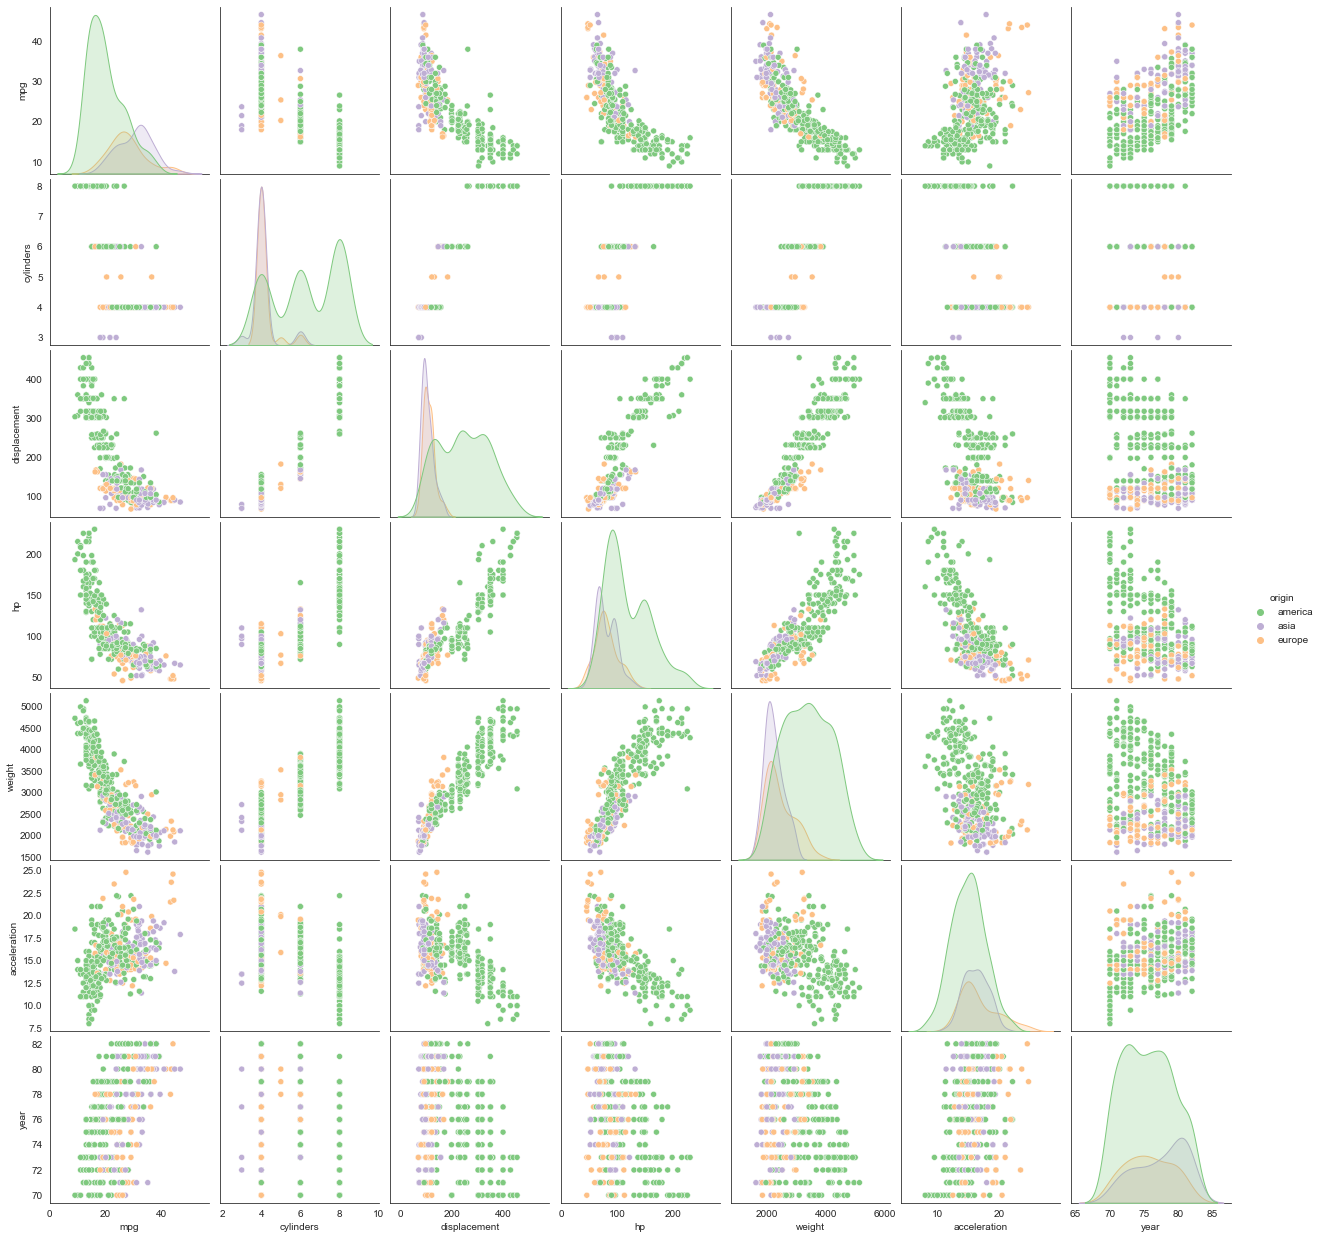

In [12]:
sns.pairplot(d, hue='origin');

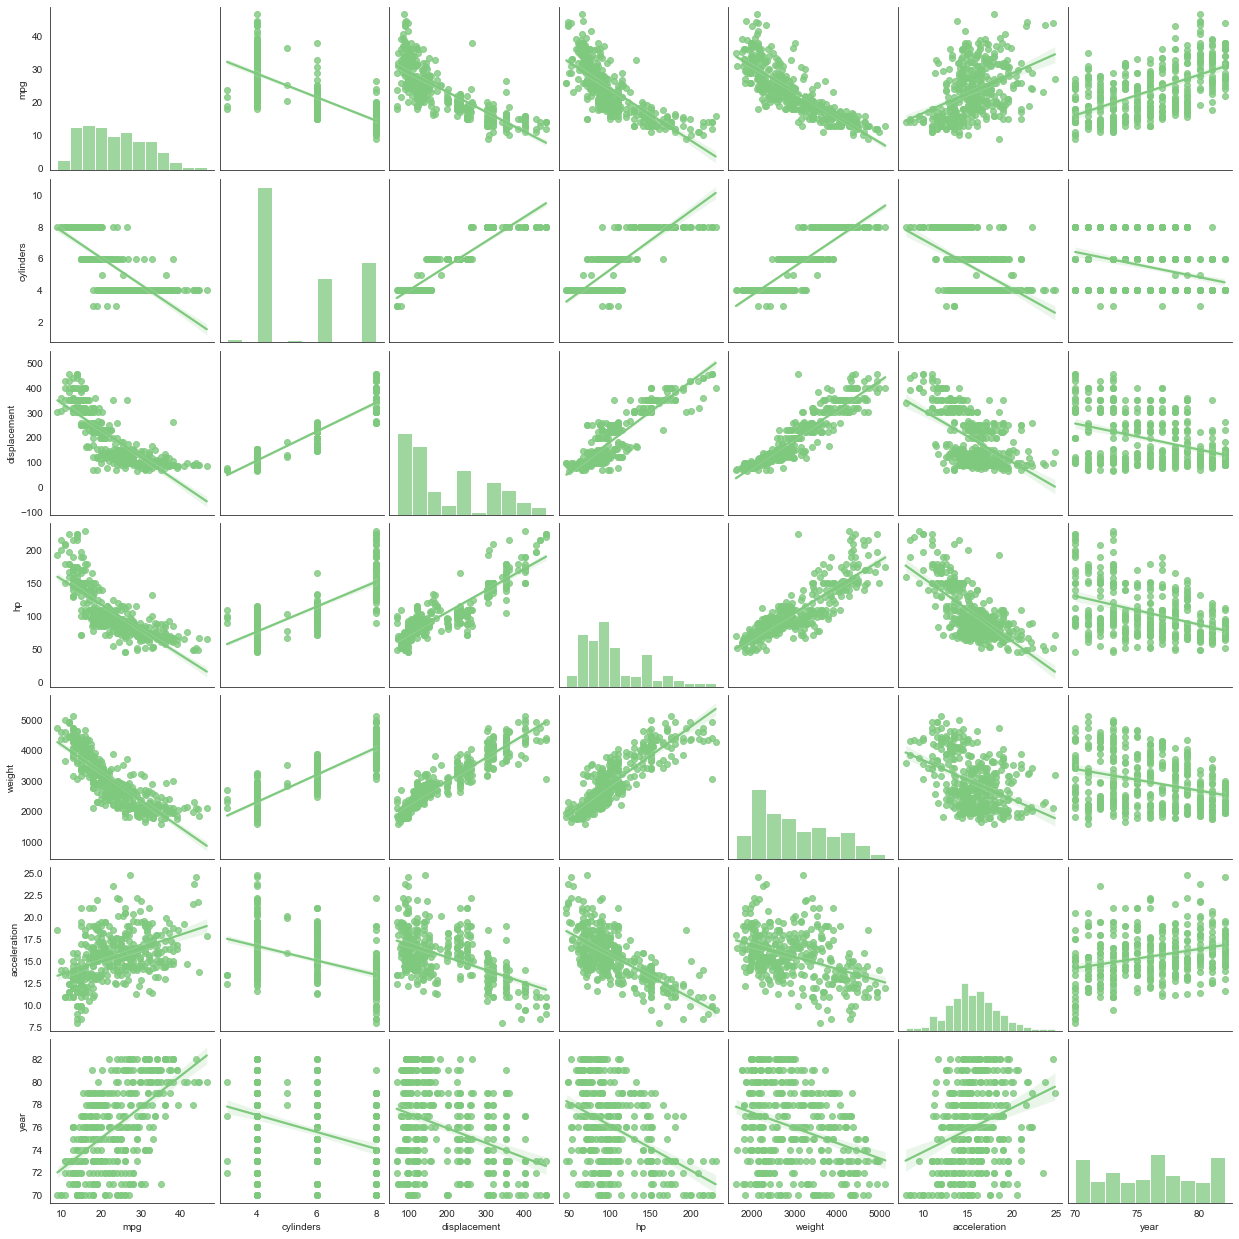

In [13]:
#change the kind og the plot to 'reg' ('regression') to also plot the regression lines
#change the diag_kind to 'hist' to plot the histogram instead of the kernel density estimate on the diagonal
sns.pairplot(d, kind='reg', diag_kind='hist');

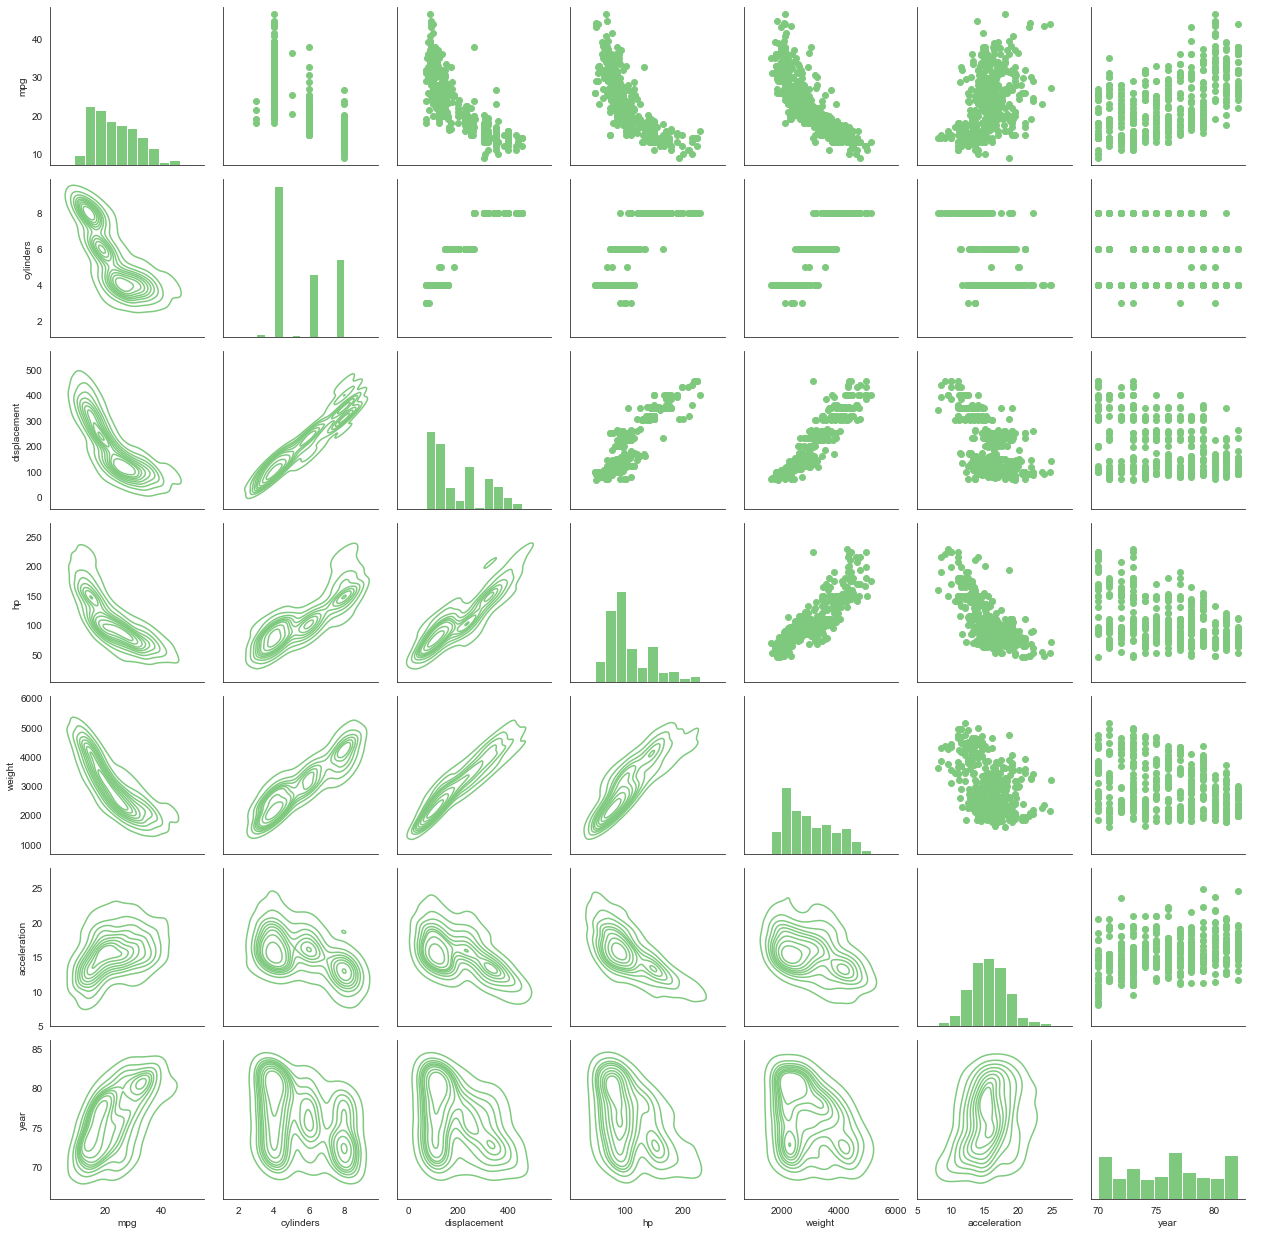

In [ ]:
pg = sns.PairGrid(d)
pg = pg.map_diag(plt.hist) #plot the histogram on the diagonal
pg = pg.map_upper(plt.scatter) #above the diagonal plot the scatterplots
pg = pg.map_lower(sns.kdeplot) #below the diagonal plot the kernel density estimates
pg = pg.add_legend()